In [1]:
%matplotlib inline
%pylab
%load_ext autoreload
%autoreload 2
%matplotlib notebook
%config InlineBackend.figure_format='retina'

import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
from scipy.optimize import curve_fit

from Xana import Xana
from Xana.misc.makemask import masker
from matplotlib.colors import LogNorm
from Xana import Soq

from glob import glob
from Xana import CorrFunc
from Xana.Xfit.fitg2global import G2
from Xana.Xfit.fit_basic import fit_basic
from Xana.misc.add_colorbar import add_colorbar
import configparser

import pandas as pd
import pickle
import h5py

Using matplotlib backend: <object object at 0x2ac957b278b0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

'/asap3/petra3/gpfs/p10/2022/data/11014696/processed/maddalena/01-notebooks'

In [3]:
ls ../06-scripts

plots.py  __pycache__/  xana_tools.py


# Elog

In [22]:
elog = pd.read_pickle("../02-sources/elog")

In [23]:
sub_elog = elog[(elog['folder'].str.contains(f'{sample}', na=False)) & (elog['# Si absorber (25um each)']==6)]
sub_elog

,Run n,Sample,Sample no. (label),folder,scan number,Short comment,cooling rate (K/min),Target temperature (K),Detector,Beam size (um),# Si absorber (25um each),transmission,Exposure time per frame (s),number of frames,Total exposure time (s),Mesh (spots x lines),comments
557,448,hyd lys h0.25,1.1,HydLys_0p25_2_00003,NaN,fluences,NaN,290,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
559,450,hyd lys h0.25,1.1,HydLys_0p25_2_00005,NaN,temperatures epseries,NaN,280,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
560,451,hyd lys h0.25,1.1,HydLys_0p25_2_00006,NaN,temperatures epseries,NaN,270,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
561,452,hyd lys h0.25,1.1,HydLys_0p25_2_00007,NaN,temperatures epseries,NaN,260,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
562,453,hyd lys h0.25,1.1,HydLys_0p25_2_00008,NaN,temperatures epseries,NaN,250,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
563,454,hyd lys h0.25,1.1,HydLys_0p25_2_00009,NaN,temperatures epseries,NaN,240,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
564,455,hyd lys h0.25,1.1,HydLys_0p25_2_00010,NaN,temperatures epseries,NaN,230,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
565,456,hyd lys h0.25,1.1,HydLys_0p25_2_00011,NaN,temperatures epseries,NaN,220,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
566,457,hyd lys h0.25,1.1,HydLys_0p25_2_00012,NaN,temperatures epseries,NaN,210,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN
567,458,hyd lys h0.25,1.1,HydLys_0p25_2_00013,NaN,temperatures epseries,NaN,200,NaN,30x30,6.0,NaN,"0,5",2000.0,1000,NaN,NaN


# Measurement details

In [6]:
d = Xana()
d.load_db('../05-analysis-phis/analysis_database.pkl')

Try loading database:
	/asap3/petra3/gpfs/p10/2022/data/11014696/processed/maddalena/05-analysis-phis/analysis_database.pkl
Successfully loaded database


In [7]:
sample = 'HydLys_0p25_2' # HydLys_0p25_2 or HydLys_0p29_2

# SAXS

In [18]:
inds_saxs = d.db[(d.db['sample'] == sample) 
           & (d.db['analysis']=='saxs')
            & (d.db.index.values > 7 )
            & (d.db['series'] != 4 )
                 & (d.db.index.values < 64 )
               ].index.values
display(d.db.loc[inds_saxs])

,use,sample,analysis,series,subset,t_delay,t_exposure,t_readout,nframes,first,last,master,datdir,mod,savname,savfile,setupfile,comment
9,True,HydLys_0p25_2,saxs,3,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-08 17:01:21.884760,s0003_0009.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
13,True,HydLys_0p25_2,saxs,6,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-09 11:34:26.810100,s0006_0013.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
15,True,HydLys_0p25_2,saxs,7,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-09 11:51:51.739624,s0007_0015.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
17,True,HydLys_0p25_2,saxs,8,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-09 12:01:03.484563,s0008_0017.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
19,True,HydLys_0p25_2,saxs,9,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-09 12:13:50.291399,s0009_0019.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
21,True,HydLys_0p25_2,saxs,11,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-09 13:25:44.202365,s0011_0021.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
23,True,HydLys_0p25_2,saxs,12,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-09 14:54:23.759385,s0012_0023.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
25,True,HydLys_0p25_2,saxs,5,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-10 10:36:56.762274,s0005_0025.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
27,True,HydLys_0p25_2,saxs,10,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-10 10:43:38.084875,s0010_0027.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,
29,True,HydLys_0p25_2,saxs,13,0,0.503,0.5,0.00001,1990,10,1999,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,/asap3/petra3/gpfs/p10/2022/data/11014696/raw/...,2022-11-10 11:00:40.703492,s0013_0029.pkl,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,/asap3/petra3/gpfs/p10/2022/data/11014696/proc...,


In [19]:
series_n2 = d.db.loc[inds_saxs, 'series'].values
inds_saxs_sorted = [x for _,x in sorted(zip(series_n2, inds_saxs))]

In [20]:
series_ns2 = d.db.loc[inds_saxs_sorted, 'series'].values
series_ns2

array([3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype=object)

In [24]:
T = np.array(sub_elog['Target temperature (K)'].values, dtype=int)
T

array([290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180])

In [25]:
def fit(function,x,y,p0=None,sigma=None,bounds=[None,None],xc_len=False):
    '''
    fits a function and return the fit resulting parameters and curve
    '''
    popt,pcov = curve_fit(function,x,y,p0=p0,sigma=sigma,bounds=bounds)
    if xc_len: xc = np.linspace(min(x),max(x),len(x))
    else: xc = np.linspace(min(x),max(x),1000)
    
    curve = function(xc,*popt)
    perr = np.sqrt(np.diag(pcov))
    return popt,xc,curve,perr

def powerlaw(x, ampl, exp):
    return ampl * x**exp

def log_func(x, a, b):
    return a + b * np.log(x)

<IPython.core.display.Javascript object>


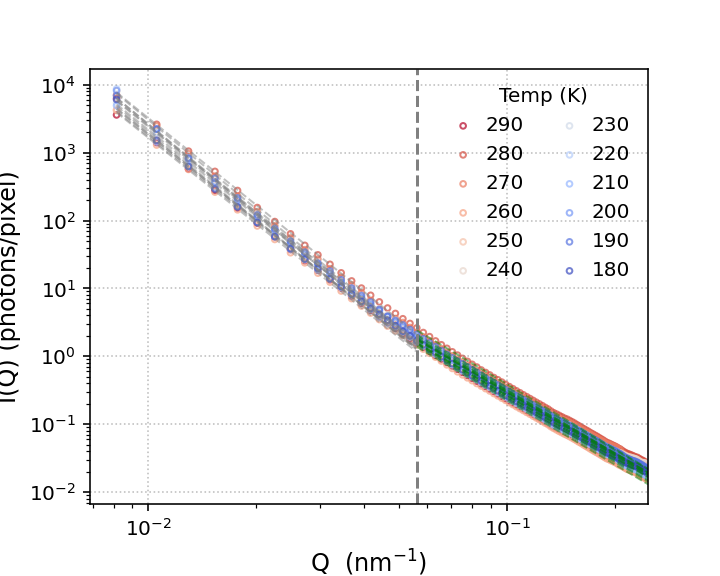

<IPython.core.display.Javascript object>


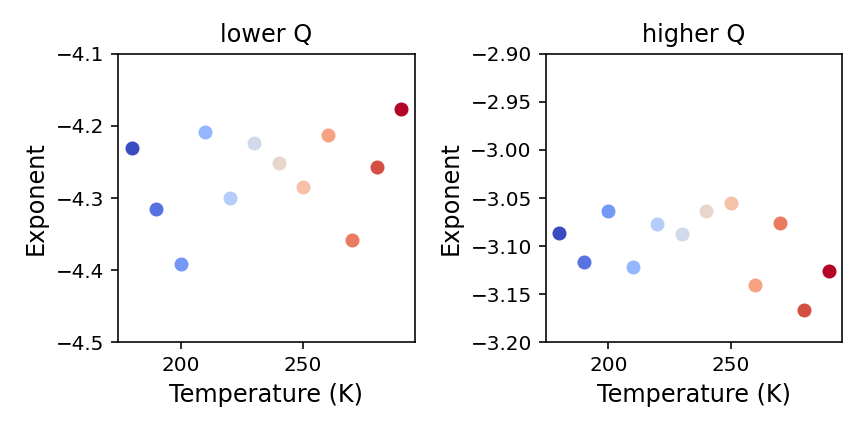

Power law fits
	fit1: -4.3 	fit2 -3.1 


In [34]:
fig, a1 = plt.subplots(1,1,figsize=(5,4))
fig2, (a2,a3) = plt.subplots(1,2,figsize=(6,3))
col = plt.cm.coolwarm_r(np.linspace(0,1,len(inds_saxs_sorted)))

fmin, fmax = 0, 200
exp1, exp2 = [], []

for i,ind in enumerate(inds_saxs_sorted[:]):
    tmp = d.get_item(ind)
    q = tmp['soq'][:,0]
    Iq = tmp['soq'][:,1]
    dIq = tmp['soq'][:,2]
    del tmp
    
    popt,xc,curve,perr = fit(powerlaw, q[fmin:fmax], Iq[fmin:fmax], sigma=dIq[fmin:fmax], p0=[6e-6, -4])
    popt2,xc2,curve2,perr2 = fit(powerlaw, q[fmax:], Iq[fmax:], sigma=dIq[fmax:], p0=[1e-4, -3])
    
    a1.plot(xc, curve, c='gray', lw=1, ls='--', alpha=.5)
    a1.plot(xc2, curve2, c='g', lw=1, ls='--', alpha=.5)
    exp1.append(popt[1])
    exp2.append(popt2[1])
    a1.scatter(q[::10], Iq[::10], color=col[i], s=8, alpha=.7, facecolors='none',label=T[i])
    a2.scatter(T[i], popt[1], marker='o', color=col[i])
    a3.scatter(T[i], popt2[1], marker='o', color=col[i])
    
print("Power law fits\n\tfit1: %.1f \tfit2 %.1f " %(np.average(exp1), np.average(exp2)))

a1.axvline(x=q[fmax], ls='--', c='gray') 
a1.grid(ls=':', c='gray', alpha=.5)
a1.set_xlabel(r'Q  ($\rm nm^{-1}$)', fontsize=12)
a1.set_ylabel(r'I(Q) (photons/pixel)', fontsize=12)
a1.set_xscale('log')
a1.set_yscale('log')
# plt.ylim(1e-2,1e4)
a1.set_xlim(0,q[-1])
a1.legend(title='Temp (K)', handlelength=.6, ncol=2, frameon=False)

a2.set_title('lower Q')
a3.set_title('higher Q')
a2.set_xlabel('Temperature (K)', fontsize=12)
a3.set_xlabel('Temperature (K)', fontsize=12)
a2.set_ylabel('Exponent', fontsize=12)
a3.set_ylabel('Exponent', fontsize=12)
a2.set_ylim(-4.5, -4.1)
a3.set_ylim(-3.2, -2.9)

plt.tight_layout()
# plt.savefig('../09-plots/saxs.png', dpi=300)
plt.show()